In [ ]:
import wrds
db = wrds.Connection(wrds_username = 'pujas')
db.create_pgpass_file()

In [108]:
from pandas import Series, DataFrame
import pandas as pd
import re
from datetime import datetime
import copy
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
%pylab inline


#read in data and clean columns
df_mf = pd.read_csv('MFData.csv')
df_mf['date'] = pd.to_datetime(df_mf['caldt'],format='%Y%m%d')
df_mf.sort_values(by='date')


Populating the interactive namespace from numpy and matplotlib


,summary_period2,crsp_fundno,caldt,nav_latest,nav_latest_dt,Common Stock,Preferred Stock,Convertible Bonds,Corporate Bonds,Municipal Bonds,Government Bonds,fund_name,Latest NAV Data,lipper_class,lipper_obj_cd,date
0,AQ,105,20091231,7.460,20091231,97.92,0.00,0.00,0.00,0.00,0.00,American Pension Investors Trust: API Efficien...,20190628.0,GMLC,GL,2009-12-31
86745,AQ,20707,20091231,1.000,20091231,NaN,NaN,NaN,NaN,NaN,NaN,Money Market Obligations Trust: Government Obl...,20190628.0,IUS,IUS,2009-12-31
86755,AQ,20708,20091231,1.000,20091231,NaN,NaN,NaN,NaN,NaN,NaN,Money Market Obligations Trust: Automated Cash...,20151130.0,MM,MM,2009-12-31
86762,AQ,20709,20091231,1.000,20091231,NaN,NaN,NaN,NaN,NaN,NaN,Money Market Obligations Trust: Treasury Oblig...,20190628.0,ITM,ITM,2009-12-31
86772,AQ,20710,20091231,1.000,20091231,NaN,NaN,NaN,NaN,NaN,NaN,Money Market Obligations Trust: Tax-Free Oblig...,20190628.0,ITE,ITE,2009-12-31
86782,AQ,20711,20091231,1.000,20091231,NaN,NaN,NaN,NaN,NaN,NaN,"MoneyMart Assets, Inc; Class A Shares",20190628.0,MM,MM,2009-12-31
86792,AQ,20712,20091231,7.570,20091231,99.33,0.00,0.00,0.00,0.00,0.00,Pacific Life Funds: PL Large-Cap Growth Fund; ...,20100630.0,LCGE,GI,2009-12-31
86793,AQ,20716,20091231,8.400,20091231,97.54,0.00,0.00,0.00,0.00,0.00,Pacific Life Funds: PL Real Estate Fund; Class...,20100630.0,RE,RE,2009-12-31
86794,AQ,20719,20091231,8.050,20091231,97.76,0.00,0.00,0.00,0.00,0.00,Pacific Life Funds: PL Mid-Cap Equity Fund; Cl...,20100630.0,MCCE,MC,2009-12-31
86795,AQ,20723,20091231,9.940,20091231,0.00,0.00,0.00,0.00,0.00,0.00,Pacific Life Funds: PL Short Duration Bond Fun...,20100630.0,SII,SII,2009-12-31


In [17]:
mask1 = df_mf['lipper_obj_cd'] == "SG" 
mask2= df_mf['lipper_class'] == 'SCCE' 
mask3 = df_mf['lipper_class'] =='SCGE'
mask4 = df_mf['lipper_class'] =="SCVE"

In [90]:
mut_funds = df_mf[mask1|mask2|mask3|mask4]
mut_funds

,summary_period2,crsp_fundno,caldt,nav_latest,nav_latest_dt,Common Stock,Preferred Stock,Convertible Bonds,Corporate Bonds,Municipal Bonds,Government Bonds,fund_name,Latest NAV Data,lipper_class,lipper_obj_cd,date
71,AQ,2727,20091231,11.3700,20091231,71.89,0.0,0.0,0.00,0.00,0.00,GuideStone Funds: Small Cap Equity Fund; GS4 C...,20190628.0,SCCE,SG,2009-12-31
72,AQ,2727,20101231,14.4600,20101231,83.68,0.0,0.0,2.93,0.15,2.95,GuideStone Funds: Small Cap Equity Fund; GS4 C...,20190628.0,SCCE,SG,2010-12-31
73,AQ,2727,20111230,14.6200,20111230,82.66,0.0,0.0,2.91,0.08,1.32,GuideStone Funds: Small Cap Equity Fund; GS4 C...,20190628.0,SCCE,SG,2011-12-30
74,AQ,2727,20121231,15.9400,20121231,84.07,0.0,0.0,3.26,0.12,1.82,GuideStone Funds: Small Cap Equity Fund; GS4 C...,20190628.0,SCCE,SG,2012-12-31
75,AQ,2727,20131231,18.1800,20131231,82.92,0.0,0.0,2.98,0.23,2.44,GuideStone Funds: Small Cap Equity Fund; GS4 C...,20190628.0,SCCE,SG,2013-12-31
76,AQ,2727,20141231,17.0800,20141231,83.38,0.0,0.0,0.00,0.00,0.00,GuideStone Funds: Small Cap Equity Fund; Inves...,20190628.0,SCCE,SG,2014-12-31
77,AQ,2727,20151231,15.1700,20151231,81.84,0.0,0.0,0.00,0.00,0.00,GuideStone Funds: Small Cap Equity Fund; Inves...,20190628.0,SCCE,SG,2015-12-31
78,AQ,2727,20161230,17.5600,20161230,80.97,0.0,0.0,0.00,0.00,2.44,GuideStone Funds: Small Cap Equity Fund; Inves...,20190628.0,SCCE,SG,2016-12-30
79,AQ,2727,20171229,18.3700,20171229,90.81,0.0,0.0,0.00,0.00,2.92,GuideStone Funds: Small Cap Equity Fund; Inves...,20190628.0,SCCE,SG,2017-12-29
80,AQ,2727,20181231,13.0100,20181231,94.88,0.4,0.0,0.00,0.00,2.57,GuideStone Funds: Small Cap Equity Fund; Inves...,20190628.0,SCCE,SG,2018-12-31


In [91]:
mut_funds['NC_stock'] = mut_funds['Preferred Stock'] +  mut_funds['Convertible Bonds'] +  mut_funds['Corporate Bonds'] + mut_funds['Municipal Bonds'] + mut_funds['Government Bonds']
nc_mask = mut_funds['NC_stock'] == 0
#mut_funds[nc_mask]
cs_mask = mut_funds['Common Stock'] > 0
mut_funds = mut_funds[cs_mask & nc_mask]
mut_funds = mut_funds.sort_values(by = 'caldt')

C:\Users\pujas\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
df_returns = pd.read_csv('MonthlyReturn09-19.csv')
df_returns['date'] = pd.to_datetime(df_returns['caldt'],format='%Y%m%d')
returns = df_returns
returns.groupby('crsp_fundno').head()

,caldt,crsp_fundno,mtna,mret,mnav,date
0,20090130,105,23.7,-0.060784,4.79,2009-01-30
1,20090227,105,21.0,-0.091858,4.35,2009-02-27
2,20090331,105,22.1,0.098851,4.78,2009-03-31
3,20090430,105,25.3,0.156904,5.53,2009-04-30
4,20090529,105,25.9,0.081374,5.98,2009-05-29
120,20090331,198,56.2,NaN,NaN,2009-03-31
121,20090430,198,60.6,NaN,NaN,2009-04-30
122,20090630,198,62.5,NaN,NaN,2009-06-30
123,20090731,198,48.0,NaN,NaN,2009-07-31
124,20090831,198,43.6,NaN,NaN,2009-08-31


In [131]:
mut_funds['caldt'].unique()
merge = mut_funds.merge(returns, left_on=['crsp_fundno','caldt'], right_on=['crsp_fundno','caldt'])
merge


,summary_period2,crsp_fundno,caldt,nav_latest,nav_latest_dt,Common Stock,Preferred Stock,Convertible Bonds,Corporate Bonds,Municipal Bonds,...,fund_name,Latest NAV Data,lipper_class,lipper_obj_cd,date_x,NC_stock,mtna,mret,mnav,date_y
0,AQ,2727,20091231,11.37,20091231,71.89,0.0,0.0,0.0,0.0,...,GuideStone Funds: Small Cap Equity Fund; GS4 C...,20190628.0,SCCE,SG,2009-12-31,0.0,356.1,0.072062,11.37,2009-12-31
1,AQ,15051,20091231,16.92,20091231,98.20,0.0,0.0,0.0,0.0,...,"Hartford Mutual Funds, Inc: Hartford Small Com...",20190628.0,SCGE,SG,2009-12-31,0.0,14.6,0.08046,16.92,2009-12-31
2,AQ,15079,20091231,23.41,20091231,99.09,0.0,0.0,0.0,0.0,...,"Heartland Group, Inc: Heartland Value Plus Fun...",20190628.0,SCVE,SG,2009-12-31,0.0,767.7,0.061678,23.41,2009-12-31
3,AQ,15084,20091231,36.18,20091231,93.93,0.0,0.0,0.0,0.0,...,"Heartland Group, Inc: Heartland Value Fund; In...",20190628.0,SCCE,SG,2009-12-31,0.0,1172.3,0.059444,36.18,2009-12-31
4,AQ,15109,20091231,9.65,20091231,91.66,0.0,0.0,0.0,0.0,...,"Hennessy Mutual Funds, Inc: Hennessy Cornersto...",20190628.0,SCCE,SG,2009-12-31,0.0,238.7,0.048913,9.65,2009-12-31
5,AQ,15045,20091231,15.85,20091231,98.20,0.0,0.0,0.0,0.0,...,"Hartford Mutual Funds, Inc: Hartford Small Com...",20190628.0,SCGE,SG,2009-12-31,0.0,17.9,0.080436,15.85,2009-12-31
6,AQ,15112,20091231,12.42,20091231,94.17,0.0,0.0,0.0,0.0,...,Hennessy Funds Trust: Hennessy Cornerstone Gro...,20110930.0,SCGE,G,2009-12-31,0.0,31.7,0.08094,12.42,2009-12-31
7,AQ,15134,20091231,24.06,20091231,99.61,0.0,0.0,0.0,0.0,...,Eagle Series Trust: Eagle Small Cap Growth Fun...,20190628.0,SCCE,SG,2009-12-31,0.0,65.8,0.082808,24.06,2009-12-31
8,AQ,15142,20091231,28.60,20091231,99.61,0.0,0.0,0.0,0.0,...,Eagle Series Trust: Eagle Small Cap Growth Fun...,20190628.0,SCCE,SG,2009-12-31,0.0,33.9,0.084155,28.60,2009-12-31
9,AQ,15143,20091231,28.04,20091231,99.61,0.0,0.0,0.0,0.0,...,Eagle Series Trust: Eagle Small Cap Growth Fun...,20190628.0,SCCE,SG,2009-12-31,0.0,1.8,0.083881,28.04,2009-12-31


In [132]:
returns.dropna(how = 'any')

max1 = merge['mtna'].max()
min1 = merge['mtna'].min()
max1 - min1

43292.700000000004

In [104]:
merge['mtna'].std()

1960.5826453205175

In [123]:
merge['mtna'].median()

59.4

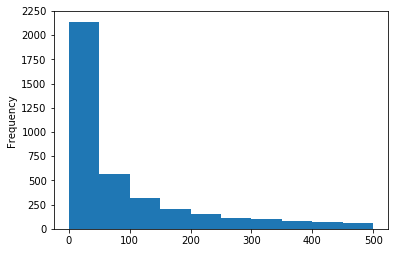

In [133]:
x = merge['crsp_fundno']
y = merge['mtna']
under5000 = merge['mtna'] < 500
under = merge[under5000]
under['mtna'].plot(kind = 'hist')


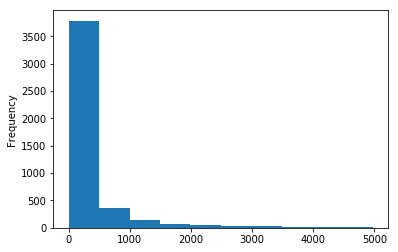

In [126]:
daf= merge['mtna'] < 5000
new= merge[daf]
new['mtna'].plot(kind = 'hist')

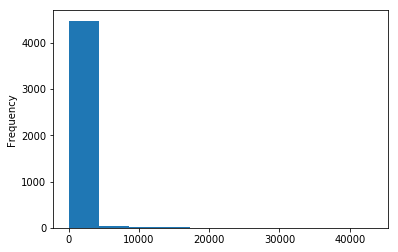

In [125]:
merge['mtna'].plot(kind = 'hist')

In [235]:
merge['mtna_bin'] = pd.cut(x=merge['mtna'], bins=[0, 50, 100, 300, 5000, merge['mtna'].max()])
merge

,summary_period2,crsp_fundno,caldt,nav_latest,nav_latest_dt,Common Stock,Preferred Stock,Convertible Bonds,Corporate Bonds,Municipal Bonds,...,Latest NAV Data,lipper_class,lipper_obj_cd,date_x,NC_stock,mtna,mret,mnav,date_y,mtna_bin
0,AQ,2727,2009-12-31,11.37,20091231,71.89,0.0,0.0,0.0,0.0,...,20190628.0,SCCE,SG,2009-12-31,0.0,356.1,0.072062,11.37,2009-12-31,"(300.0, 5000.0]"
1,AQ,15051,2009-12-31,16.92,20091231,98.20,0.0,0.0,0.0,0.0,...,20190628.0,SCGE,SG,2009-12-31,0.0,14.6,0.080460,16.92,2009-12-31,"(0.0, 50.0]"
2,AQ,15079,2009-12-31,23.41,20091231,99.09,0.0,0.0,0.0,0.0,...,20190628.0,SCVE,SG,2009-12-31,0.0,767.7,0.061678,23.41,2009-12-31,"(300.0, 5000.0]"
3,AQ,15084,2009-12-31,36.18,20091231,93.93,0.0,0.0,0.0,0.0,...,20190628.0,SCCE,SG,2009-12-31,0.0,1172.3,0.059444,36.18,2009-12-31,"(300.0, 5000.0]"
4,AQ,15109,2009-12-31,9.65,20091231,91.66,0.0,0.0,0.0,0.0,...,20190628.0,SCCE,SG,2009-12-31,0.0,238.7,0.048913,9.65,2009-12-31,"(100.0, 300.0]"
5,AQ,15045,2009-12-31,15.85,20091231,98.20,0.0,0.0,0.0,0.0,...,20190628.0,SCGE,SG,2009-12-31,0.0,17.9,0.080436,15.85,2009-12-31,"(0.0, 50.0]"
6,AQ,15112,2009-12-31,12.42,20091231,94.17,0.0,0.0,0.0,0.0,...,20110930.0,SCGE,G,2009-12-31,0.0,31.7,0.080940,12.42,2009-12-31,"(0.0, 50.0]"
7,AQ,15134,2009-12-31,24.06,20091231,99.61,0.0,0.0,0.0,0.0,...,20190628.0,SCCE,SG,2009-12-31,0.0,65.8,0.082808,24.06,2009-12-31,"(50.0, 100.0]"
8,AQ,15142,2009-12-31,28.60,20091231,99.61,0.0,0.0,0.0,0.0,...,20190628.0,SCCE,SG,2009-12-31,0.0,33.9,0.084155,28.60,2009-12-31,"(0.0, 50.0]"
9,AQ,15143,2009-12-31,28.04,20091231,99.61,0.0,0.0,0.0,0.0,...,20190628.0,SCCE,SG,2009-12-31,0.0,1.8,0.083881,28.04,2009-12-31,"(0.0, 50.0]"


In [236]:
merge['mret']=merge['mret'].apply(pd.to_numeric)
merge.groupby(['caldt', 'mtna_bin' ])['mret'].agg(['count'])

count
caldt      mtna_bin                
2009-12-31 (0.0, 50.0]          471
           (50.0, 100.0]        102
           (100.0, 300.0]       130
           (300.0, 5000.0]      126
           (5000.0, 43292.8]      7
2010-12-31 (0.0, 50.0]          288
           (50.0, 100.0]         74
           (100.0, 300.0]       100
           (300.0, 5000.0]      113
           (5000.0, 43292.8]      4
2011-12-30 (0.0, 50.0]          288
           (50.0, 100.0]         72
           (100.0, 300.0]        91
           (300.0, 5000.0]      100
           (5000.0, 43292.8]      4
2012-12-31 (0.0, 50.0]          263
           (50.0, 100.0]         57
           (100.0, 300.0]        85
           (300.0, 5000.0]      119
           (5000.0, 43292.8]      4
2013-12-31 (0.0, 50.0]          227
           (50.0, 100.0]         59
           (100.0, 300.0]        82
           (300.0, 5000.0]      139
           (5000.0, 43292.8]      8
2014-12-31 (0.0, 50.0]          228
           (50.0, 100.0]         63
           (100.0, 300.0]        95
           (300.0, 5000.0]      130
           (5000.0, 43292.8]     10
2015-12-31 (0.0, 50.0]          175
           (50.0, 100.0]         74
           (100.0, 300.0]        97
           (300.0, 5000.0]      122
           (5000.0, 43292.8]      9
2016-12-30 (0.0, 50.0]           62
           (50.0, 100.0]         21
           (100.0, 300.0]        33
           (300.0, 5000.0]       54
           (5000.0, 43292.8]      7
2017-12-29 (0.0, 50.0]           68
           (50.0, 100.0]         22
           (100.0, 300.0]        32
           (300.0, 5000.0]       56
           (5000.0, 43292.8]      7
2018-12-31 (0.0, 50.0]           69
           (50.0, 100.0]         19
           (100.0, 300.0]        32
           (300.0, 5000.0]       51
           (5000.0, 43292.8]      9

In [237]:
graph1 = merge.groupby(['mtna_bin'])['mret'].agg(['mean'])
graph1

,mean
mtna_bin,
"(0.0, 50.0]",0.027611
"(50.0, 100.0]",0.021338
"(100.0, 300.0]",0.019437
"(300.0, 5000.0]",0.015517
"(5000.0, 43292.8]",-0.000385


Text(0.5,0,'Year')

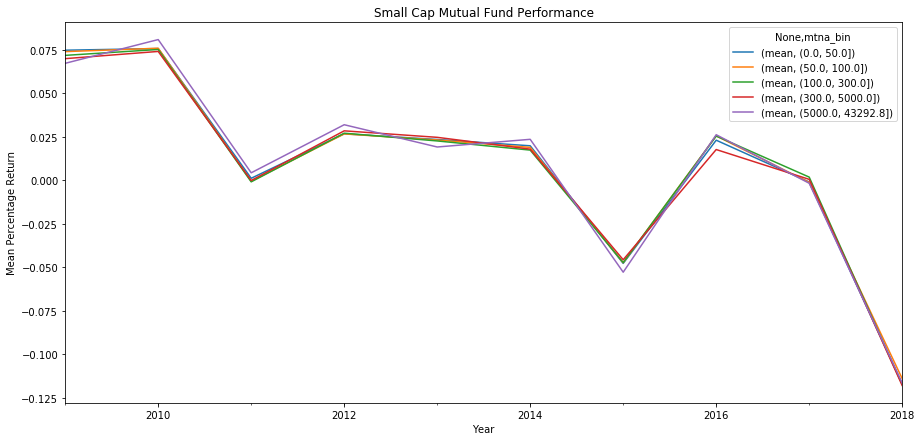

In [244]:
merge['caldt'] = pd.to_datetime(merge['caldt'],format='%Y%m%d')
merge.sort_values(by='caldt')

new_df = merge[['caldt','mtna_bin','mret']]
fig, ax =plt.subplots(figsize=(15,7))
graph2 = new_df.groupby(['caldt','mtna_bin'])['mret'].agg(['mean']).unstack().plot(ax=ax, title='Small Cap Mutual Fund Performance')
ylabel('Mean Percentage Return')
xlabel('Year')

In [221]:
mask_whatever = new_df['caldt'] > 2015-12-31
new_df[mask_whatever].groupby(['caldt','mtna_bin'])['mret'].agg(['mean']).unstack()

TypeError: Invalid comparison between dtype=datetime64[ns] and int

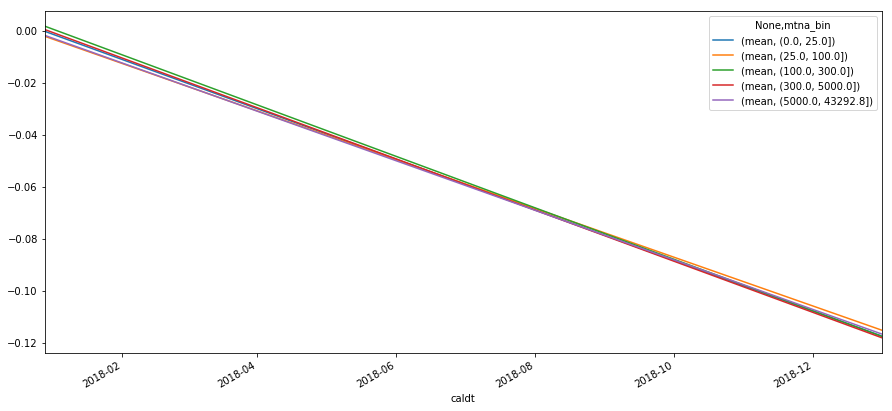

In [230]:
fig, ax =plt.subplots(figsize=(15,7))
graph3 = new_df.groupby(['caldt','mtna_bin'])['mret'].agg(['mean']).unstack().iloc[8:].plot(ax=ax)
graph3